<a href="https://colab.research.google.com/github/CMOONCS/NLP-Gender-Bias/blob/main/WordEmbedding__NLPBias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Bias-- a brief introduction using a pretrainined word embedding model
-- <font color = maroon ><i> **Note:** To make and save the changes to the colab notebook go to 'File -> Save a copy in Drive' </i> <br>
-- Follow  instructions to execute steps




---





***Instruction*** <font color = 'maroon'>--> For executing steps run cell as shown in the figure:
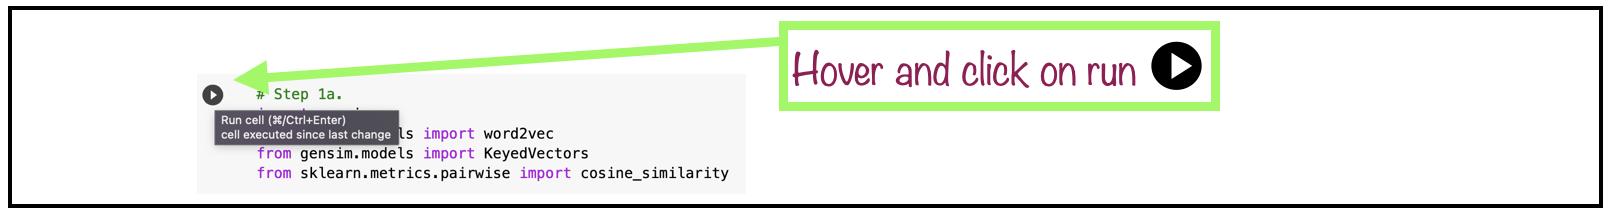


## <b> Step 1. <font color = 'blue'> Import important libraries for experiments !

**Step 1a.** :<font color = blue> Import packages from gensim and sklean python libraries 

In [ ]:
# Step 1a.
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

**Step 1b.** : <font color = 'blue'>Use Gensim API to download several different corpora and pretrained models

In [ ]:
# Step 1b.
import gensim.downloader as api


**Step 1c.** : <font color = 'blue'> Load a pretrained word embedding model 

In [ ]:
# Step 1c.
model = api.load("glove-wiki-gigaword-50")


[==================================================] 100.0% 66.0/66.0MB downloaded




---



##**Step 2. <font color = 'blue'>Explore Word Embedding Model**
<font color = maroon >Now we have a word embedding model which assigns a combination of values to all words present in the vocabulary of the model. In this case, each word is represented as a combination of 50 numbers which are also called as 'dimensions of the word representation'.  Lets explore words embeding further!!

**Step 2a**. : <font color = 'blue'> For a given word find values assigned by the models and known as word representation (or word embedding).

***Instruction**: <font color = 'maroon'>write the word **(all small letters)** in single quotes as shown in the figure below:
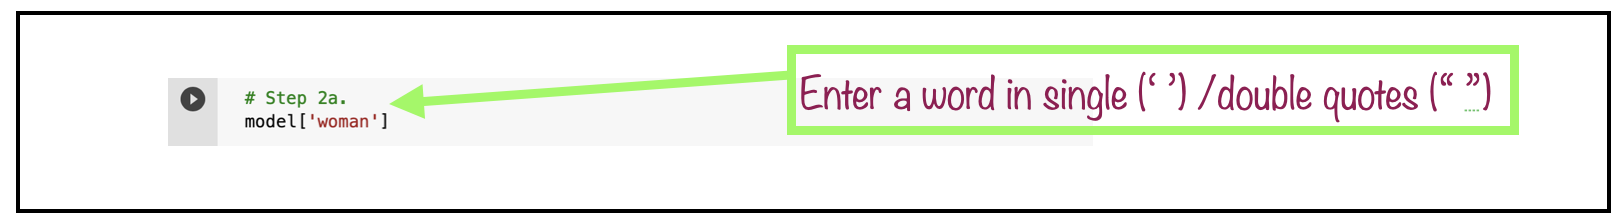

In [ ]:
# Step 2a.
model['woman']

array([-1.8153e-01,  6.4827e-01, -5.8210e-01, -4.9451e-01,  1.5415e+00,
        1.3450e+00, -4.3305e-01,  5.8059e-01,  3.5556e-01, -2.5184e-01,
        2.0254e-01, -7.1643e-01,  3.0610e-01,  5.6127e-01,  8.3928e-01,
       -3.8085e-01, -9.0875e-01,  4.3326e-01, -1.4436e-02,  2.3725e-01,
       -5.3799e-01,  1.7773e+00, -6.6433e-02,  6.9795e-01,  6.9291e-01,
       -2.6739e+00, -7.6805e-01,  3.3929e-01,  1.9695e-01, -3.5245e-01,
        2.2920e+00, -2.7411e-01, -3.0169e-01,  8.5286e-04,  1.6923e-01,
        9.1433e-02, -2.3610e-02,  3.6236e-02,  3.4488e-01, -8.3947e-01,
       -2.5174e-01,  4.2123e-01,  4.8616e-01,  2.2325e-02,  5.5760e-01,
       -8.5223e-01, -2.3073e-01, -1.3138e+00,  4.8764e-01, -1.0467e-01],
      dtype=float32)

**Step 2b.** : <font color = 'blue'>Find a few most similar words and their similarity scores with a given word according to  **word embedding** (values) assigned by the model:

In [ ]:
#Step 2b
model.most_similar('me')

[('i', 0.9546188116073608),
 ("'d", 0.943828821182251),
 ('you', 0.9431456327438354),
 ('everybody', 0.9298287630081177),
 ("'m", 0.9295357465744019),
 ('know', 0.9222412109375),
 ('?', 0.9183453321456909),
 ('somebody', 0.9170721769332886),
 ('everyone', 0.9160774350166321),
 ('really', 0.912999153137207)]

**Step2c.**: <font color ='blue'>Find top-5 similar words

In [ ]:
#Step 2c
model.most_similar("doctor", topn= 5)

[('nurse', 0.7977497577667236),
 ('physician', 0.7965210676193237),
 ('patient', 0.7611691951751709),
 ('child', 0.7558937668800354),
 ('teacher', 0.7538284659385681)]

**Step 2d.**: <font color ='blue'> Find simliarity scores between two words 

In [ ]:
#Step 2d
model.similarity('dad','grandfather')

0.6845182



---



## **Step 3.  <font color  = 'blue'>Introducing gender bias present in the model using analogy**
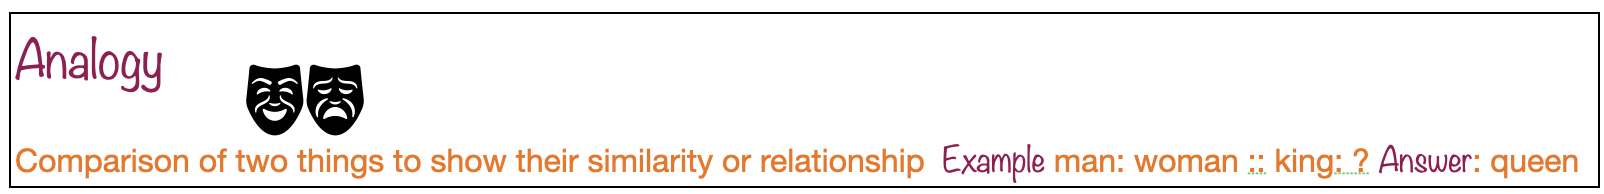

**Step 3a.**:<font color = 'blue'> Define analogy function

In [ ]:
#Step 3a
def analogy(a,b,c):
  ans = model.most_similar(positive=[b,c],negative=[a],topn =1) # E.g., woman+king-man =queen
  print ('Answer: ', ans[0][0])

Step 3b. :<font color  = 'blue'> Use this funtion to find an answer for the query words (triples)


**Example queries**

In [ ]:
#Query 1
analogy('man','woman', 'king')

Answer:  queen


In [ ]:
#Query 2
analogy('apple','red', 'orange')

Answer:  yellow


In [ ]:
#Query 3
analogy('russia','moscow', 'france')

Answer:  paris


**Check gender related words** <font color = 'blue'>Examples: father, mother, girl, boy...

In [ ]:
#1
analogy('he','she', 'father')

Answer:  mother


In [ ]:
#2
analogy('he','she', 'boy')

Answer:  girl


In [ ]:
#3
analogy('he','she', 'handsome')

Answer:  charming


**Check relation between gender related words** (he, she) **and jobs/occupations words** <font color = 'blue'> Example: actor
actress, babysitter, teacher, nurse, doctor, gardener, engineers...

In [ ]:
#1
analogy('he','she', 'schoolteacher')

Answer:  homemaker


In [ ]:
#2
analogy('he','she', 'doctor')

Answer:  nurse


In [ ]:
#3
analogy('she','he', 'nurse')

Answer:  physician


In [ ]:
#4
analogy('she','he', 'receptionist')

Answer:  janitor


In [ ]:
#5
analogy('he','she', 'pilot')

Answer:  crew


In [ ]:
#6
analogy('he','she', 'chef')

Answer:  waitress


**Using analogy function, find other social biases in NLP**

In [23]:
#1
analogy('white','black', 'gentleman')

Answer:  servant


In [31]:
#2
analogy('','terrorist', 'christian')

Answer:  targeting
